In [14]:
import os
import splat# main splat import
import splat.database as spdb
import pandas as pd
# other useful imports
from specutils.manipulation import FluxConservingResampler, LinearInterpolatedResampler, SplineInterpolatedResampler
from specutils import Spectrum1D
import astropy.units as u
import numpy as np
import pandas
import matplotlib.pyplot as plt
import astropy.units as u
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from astropy.io import fits

In [15]:
sp = splat.Spectrum(file='spex-prism_twa8b.fits',instrument='SPEX-PRISM',name='TWA 8B (M6.0gamma Std)')
splat.initiateStandards(vlg=True)
splat.STDS_VLG_SPEX['M6.0gamma'] = sp

In [16]:
normal_list = ['M0.0','M1.0','M2.0','M3.0','M4.0','M5.0','M6.0', 'M7.0', 'M8.0', 'M9.0', 'L0.0', 'L1.0', 'L2.0', 'L3.0', 'L4.0',
                  'L5.0', 'L6.0', 'L7.0', 'L8.0', 'L9.0', 'T0.0', 'T1.0', 'T2.0', 'T3.0', 'T4.0', 'T5.0', 'T6.0', 'T7.0', 
               'T8.0', 'T9.0']
dsd_list = ['d/sdM4.0','d/sdM5.0','d/sdM6.0','d/sdM7.0','d/sdM8.0','d/sdM9.0','d/sdL0.0','d/sdL1.0','d/sdL7.0']
sd_list = ['sdM2.0','sdM4.0','sdM5.0','sdM5.5','sdM6.0','sdM7.0','sdM8.0','sdM9.5','sdL0.0','sdL3.5','sdL4.0']
esd_list = ['esdM0.0','esdM4.0','esdM5.0','esdM6.5','esdM7.5','esdM8.5']
vlg_list = ['M6.0gamma','M7.0gamma','M8.0gamma','M9.0gamma','L0.0gamma','L1.0gamma','L2.0gamma','L3.0gamma','L4.0gamma','L6.0gamma']
intg_list = ['M8.0beta','L0.0beta','L1.0beta','L2.0beta','L3.0beta']
spectral_types = sd_list+esd_list+vlg_list+intg_list+normal_list+dsd_list

    
wav_002 = [(0.89, 0.91),(0.91, 0.93),(0.93, 0.95),(0.95, 0.97),(0.97, 0.99),(0.99, 1.01),
                       (1.01, 1.03),(1.03, 1.05),(1.05, 1.07),(1.07, 1.09),(1.09, 1.11), (1.11, 1.13),(1.13,1.15),(1.15, 1.17),
                       (1.17, 1.19),(1.19, 1.21),(1.21, 1.23),(1.23, 1.25),(1.25, 1.27),(1.27, 1.29),(1.29, 1.31),(1.31, 1.33),
                       (1.33, 1.35),(1.42,1.44),(1.44,1.46),(1.46,1.48),(1.48,1.50),(1.50,1.52), (1.52,1.54),(1.54,1.56),(1.56,1.58),
                       (1.58,1.60),(1.60,1.62),(1.62,1.64),(1.64,1.66),(1.66,1.68),(1.68,1.7),(1.7,1.72),(1.72,1.74),(1.74,1.76),
                       (1.76,1.78),(1.78,1.80),(1.95,1.97),(1.97,1.99),(1.99,2.01),(2.01,2.03),(2.03,2.05),(2.05,2.07),(2.07,2.09),
                       (2.09,2.11),(2.11,2.13),(2.13,2.15),(2.15,2.17),(2.17,2.19),(2.19,2.21),(2.21,2.23),(2.23,2.25),(2.25,2.27),
                       (2.27,2.29),(2.29,2.31),(2.31,2.33),(2.33,2.35),(2.35,2.37),(2.37,2.39),(2.39,2.41),(2.41,2.43),(2.43,2.45)]


returning 1 file



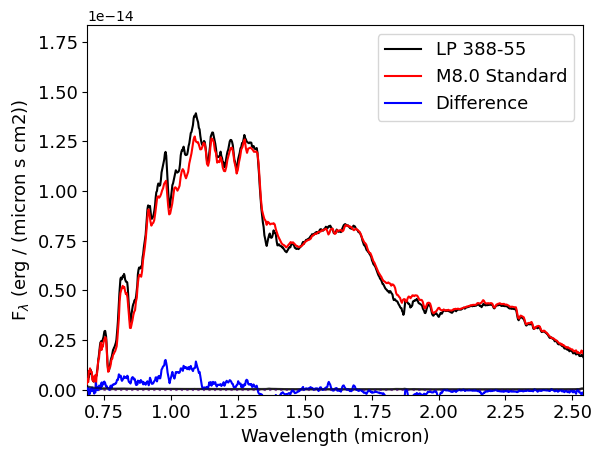

('M8.0', 158740.37835801893)

In [17]:
sp = splat.getSpectrum(name='LP 388-55')[0]
splat.classifyByStandard(sp,all=True,plot=True,fit_ranges=[0.87,2.39],return_statistic=True)

In [18]:
from parallel_adam import process_spectrum
test_x = process_spectrum('LP 388-55')[1][0][4:]


returning 1 file



In [20]:
X_single = np.array(test_x).reshape(1, -1)

In [22]:
import joblib

mdl = joblib.load("Models/knn_model.pkl")
random_seed=42
y_preds_adam = mdl.predict(X_single)

print("-" * 60) 
print(y_preds_adam)

------------------------------------------------------------
[[8 2]]
